<a href="https://colab.research.google.com/github/cyruskimani/Titanic-Dataset-Survival-KNN-Prediction-and-Spam-Classification-using-Naive-Bayes/blob/main/Week_9_Moringa_Core_IP_Cyrus_Kimani_Part_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classifier for Titanic Survival.

# Defining The Question

## a) Specifying the Question.

Overview 

The Titanic dataset contains detais of passengers who were aboard the ship when it capsized. These details include names, gender, age, etc. it also classifies passengers as having survived or not.

Applying KNN Classification, this project seeks to predict the likelyhood of a passenger's survival based on the features of the dataset.

This notebook contains a KNN Classifier which predicts the survival of passengers on the Titanic

Research Question

Build a model that determines whether or not a passenger survives on the Titanic.


## b) Defining the Metrics for Success.

The Accuracy score,f1 score, Precision and Confusion Matrix will be used to evaluate the classification of the of models.


## c) Understanding the context.

The survival of passengers on the titanic was dependent on several factors such as age and gender. 

This exercise focuses on classifying the survival of passengers based on the features of the dataset.


## d) Recording the Experimental Design.

The experimental design for this project will be composed of Exploratory Data Analysis and Prediction Models as shown below.

Exploratory Data Analysis.

* Univariate Analysis.
* Bivariate Analysis.
* Multivariate Analysis.

Classification

* K- Nearest Neighbours.



# Importing Libraries.

In [1]:
# Importing Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings(action = 'ignore')

# Loading the datsets

In [2]:
# Loading and previewing the Housing Dataset.
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

# Training Dataset.

## Information about the datasets.

In [3]:
# Previewing the top of the training dataframe
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# Previewing the bottom of the training dataframe
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking the size of the train dataset.
print('The training dataframe has:(rows,columns)=',train.shape)

The training dataframe has:(rows,columns)= (891, 12)


In [6]:
# Checking Columns and Datatypes in the train Dataset.
print('Information of the train Dataset')
print('*' *40)
train.info()

Information of the train Dataset
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*The dataset contains 891 rows, 12 columns and the respective datatypes for each column as shown above.*

In [7]:
# Obtaining a description of the dataset.
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Herman, Miss. Alice",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Getting Unique values in train dataframe columns
print('Unique records in PassengerId column',train['PassengerId'].count())
print('Unique records in Survived column',train['Survived'].unique())
print('Unique records in Pclass column',train['Pclass'].unique())
print('Unique records in Name column',train['Name'].count())
print('Unique records in Sex column',train['Sex'].unique())
print('Unique records in Age column',train['Age'].count())
print('Unique records in SibSp column',train['SibSp'].unique())
print('Unique records in Parch column',train['Parch'].unique())
print('Unique records in Ticket column',train['Ticket'].count())
print('Unique records in Fare column',train['Fare'].count())
print('Unique records in Cabin column',train['Cabin'].count())
print('Unique records in Embarked column',train['Embarked'].unique())

Unique records in PassengerId column 891
Unique records in Survived column [0 1]
Unique records in Pclass column [3 1 2]
Unique records in Name column 891
Unique records in Sex column ['male' 'female']
Unique records in Age column 714
Unique records in SibSp column [1 0 3 4 2 5 8]
Unique records in Parch column [0 1 2 5 3 4 6]
Unique records in Ticket column 891
Unique records in Fare column 891
Unique records in Cabin column 204
Unique records in Embarked column ['S' 'C' 'Q' nan]


## Data Cleaning.

### Duplicate and Null Values.

In [9]:
# Checking for duplicates.
print('Number of duplicated records = ',train.duplicated().sum())

Number of duplicated records =  0


No duplicates were found in the training dataset.

In [10]:
# Checking for null values.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age column was found to have 177 null records, while cabin and embarked had 687 and 2 null records respectively.

In [11]:
# Checking and sorting missing values in each column.
(train.isna().mean().round(3) * 100).sort_values(ascending = False)

Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

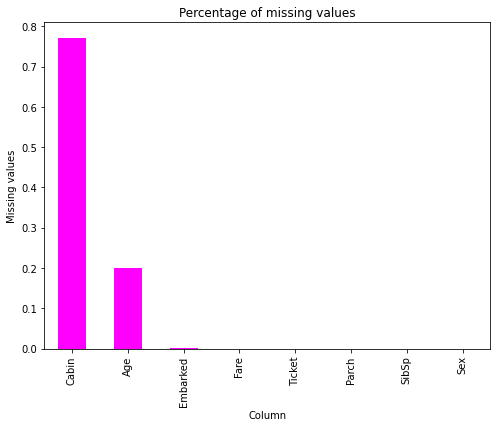

In [12]:
# Visualizing missing data.
train.isnull().mean().round(3).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'magenta')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

The cabin column was found to have 77.1% of missing values. It would be advisable to drop this column as it has a high percentage of missing records.

The age column was found to have 19.9% of missing values. This column will be imputed with the mode which is the most occurring.

The embarked column only had 0.2% of missing records. This column will be imputed with the mean.

### Imputing of Null Values.

In [13]:
# Nulls found in the Age column
print('Null values in Age column before imputing:', train.Age.isna().sum())
# Filling missing values in the Age column with the mode.
train.Age.fillna(train.Age.mode()[0], inplace = True)
print('Null values in Age column after imputing:', train.Age.isna().sum())

Null values in Age column before imputing: 177
Null values in Age column after imputing: 0


In [14]:
# Nulls found in the Embarked column
print('Null values in Embarked column before imputing:', train.Embarked.isna().sum())
# Filling missing values in the Embarked column with the mode.
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)
print('Null values in Embarked column after imputing:', train.Embarked.isna().sum())

Null values in Embarked column before imputing: 2
Null values in Embarked column after imputing: 0


### Dropping Columns.

In [15]:
# Dropping irrelevant columns.
train.drop(columns=['PassengerId','Name','Cabin','Ticket','Fare','Embarked'], inplace=True)
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


### Modifying Column Datatypes.

In [16]:
# Identifying column datatypes
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [17]:
# # Defining columns as numeric, Categorical or Boolean.

# num=['age','TSH','T3','TT4','T4U','FTI']
# categorical=['status','sex','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']
# boolean=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']

# for column in df.columns:
#   if column in num:
#     df[column] = df[column].astype('float')
#   elif column in categorical:
#     df[column] = df[column].astype('category')
#   elif column in boolean:
#     df[column] = df[column].astype('bool')
# df.info()

### Outliers.

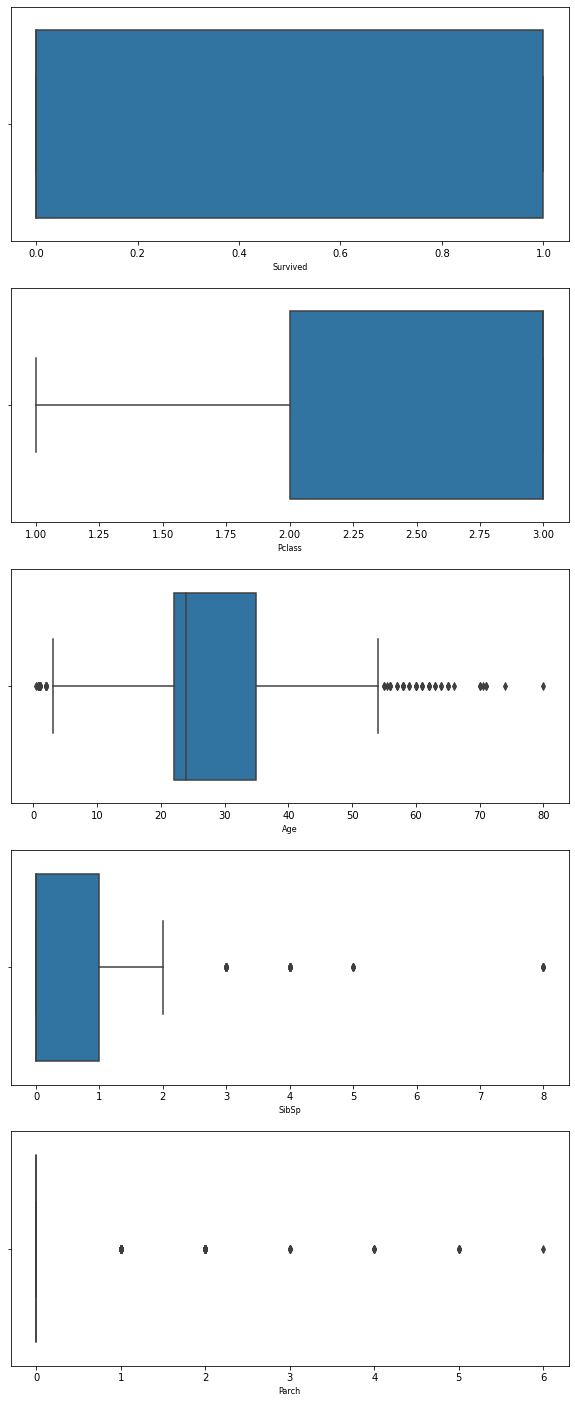

In [18]:
# Checking for outliers.
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']
fig, ax = plt.subplots(len(columns), figsize= (10,25))
for i, col_val in enumerate(columns):
  sns.boxplot(x = train[col_val], ax= ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

Outliers were found in the dataset.



# Testing dataset.

## Information about the datasets.

In [19]:
# Previewing the top of the testing dataframe.
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [20]:
# Previewing the bottom of the testing dataframe.
test.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
# Checking the size of the testing dataset.
print('The test dataframe has:(rows,columns)=',test.shape)

The test dataframe has:(rows,columns)= (418, 11)


In [22]:
# Checking Columns and Datatypes in the test dataset.
print('Information of the test Dataset')
print('*' *40)
test.info()

Information of the test Dataset
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*The testing dataframe contains 418 rows, 11 columns and the respective datatypes for each column as shown above.*

In [23]:
# Obtaining a description of the test dataset.
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Baccos, Mr. Raffull",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [24]:
# Getting Unique values in test dataframe columns.
print('Unique records in PassengerId column',test['PassengerId'].count())
print('Unique records in Pclass column',test['Pclass'].unique())
print('Unique records in Name column',test['Name'].count())
print('Unique records in Sex column',test['Sex'].unique())
print('Unique records in Age column',test['Age'].count())
print('Unique records in SibSp column',test['SibSp'].unique())
print('Unique records in Parch column',test['Parch'].unique())
print('Unique records in Ticket column',test['Ticket'].count())
print('Unique records in Fare column',test['Fare'].count())
print('Unique records in Cabin column',test['Cabin'].count())
print('Unique records in Embarked column',test['Embarked'].unique())

Unique records in PassengerId column 418
Unique records in Pclass column [3 2 1]
Unique records in Name column 418
Unique records in Sex column ['male' 'female']
Unique records in Age column 332
Unique records in SibSp column [0 1 2 3 4 5 8]
Unique records in Parch column [0 1 3 2 4 6 5 9]
Unique records in Ticket column 418
Unique records in Fare column 417
Unique records in Cabin column 91
Unique records in Embarked column ['Q' 'S' 'C']


## Data Cleaning.

### Duplicate and Null Values.

In [25]:
# Checking for duplicates.
print('Number of duplicated records = ',test.duplicated().sum())

Number of duplicated records =  0


No duplicates were found in the training dataset.

In [26]:
# Checking for null values.
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The age column was found to have 86 null records, while fare and cabin had 1 and 327 null records respectively.

In [27]:
# Checking and sorting missing values in each column.
(test.isna().mean().round(3) * 100).sort_values(ascending = False)

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
PassengerId     0.0
dtype: float64

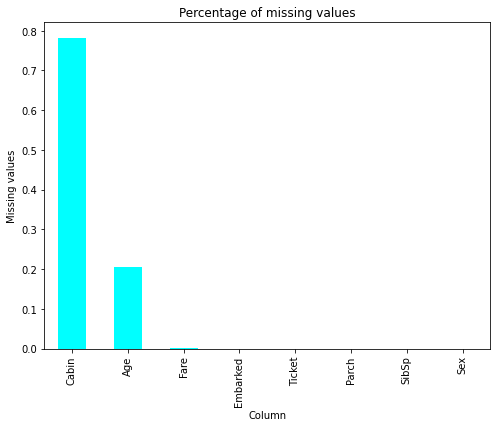

In [28]:
# Visualizing missing data.
test.isnull().mean().round(3).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'cyan')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

The cabin column was found to have 78.2% of missing values. It would be advisable to drop this column as it has a high percentage of missing records.

The age column was found to have 20.6% of missing values. This column will be imputed with the mode which is the most occurring.

The embarked column only had 0.2% of missing records. This column will be imputed with the mean.

### Imputing of Null Values.

In [29]:
# Nulls found in the Age column
print('Null values in Age column before imputing:', test.Age.isna().sum())
# Filling missing values in the Age column with the mode.
test.Age.fillna(test.Age.mode()[0], inplace = True)
print('Null values in Age column after imputing:', test.Age.isna().sum())

Null values in Age column before imputing: 86
Null values in Age column after imputing: 0


### Dropping Columns.

In [30]:
# Dropping irrelevant columns.
test.drop(columns=['PassengerId','Name','Cabin','Ticket','Fare','Embarked'], inplace=True)
test.head(2)

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0


### Modifying Column Datatypes.

In [31]:
# Identifying column datatypes
test.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
dtype: object

### Outliers.

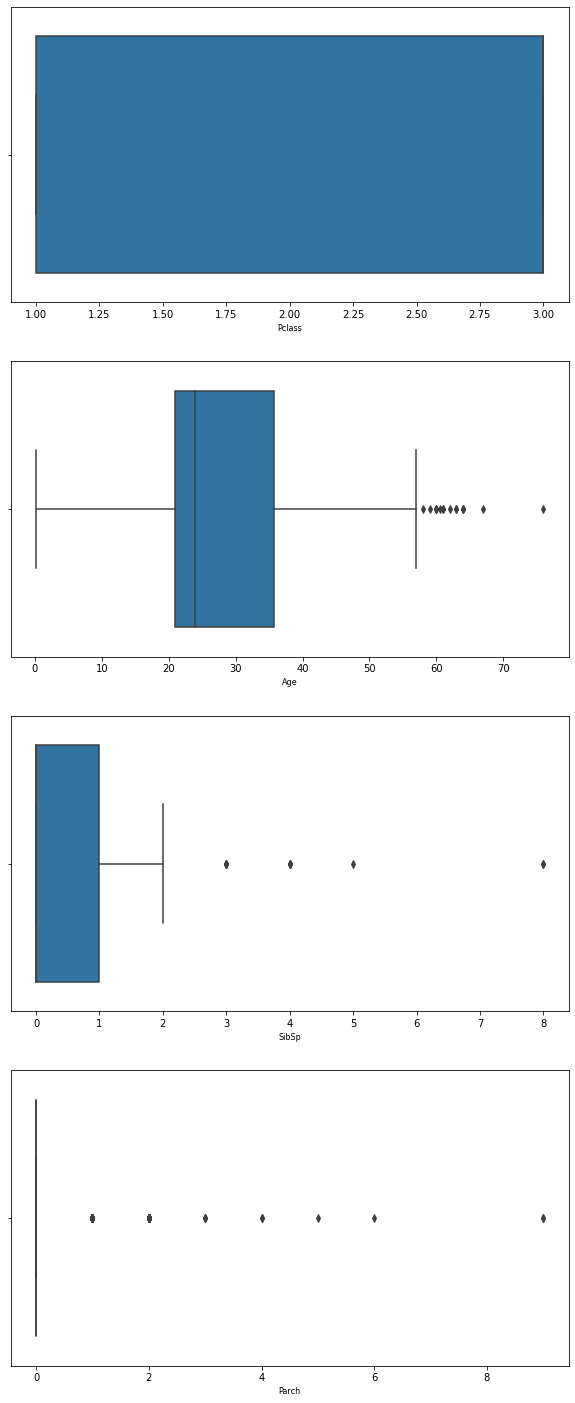

In [32]:
# Checking for outliers.
columns = ['Pclass', 'Age', 'SibSp', 'Parch']
fig, ax = plt.subplots(len(columns), figsize= (10,25))
for i, col_val in enumerate(columns):
  sns.boxplot(x = test[col_val], ax= ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

Outliers were found in the dataset.

# Exploratory Data Analysis.

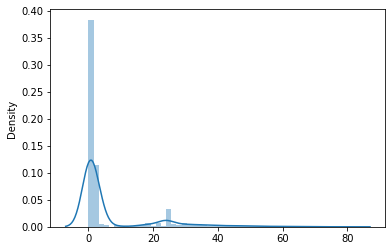

In [33]:
# Getting the distribution of the data 
X = train[['Survived','Pclass','Age','SibSp','Parch']]
sns.distplot(X)

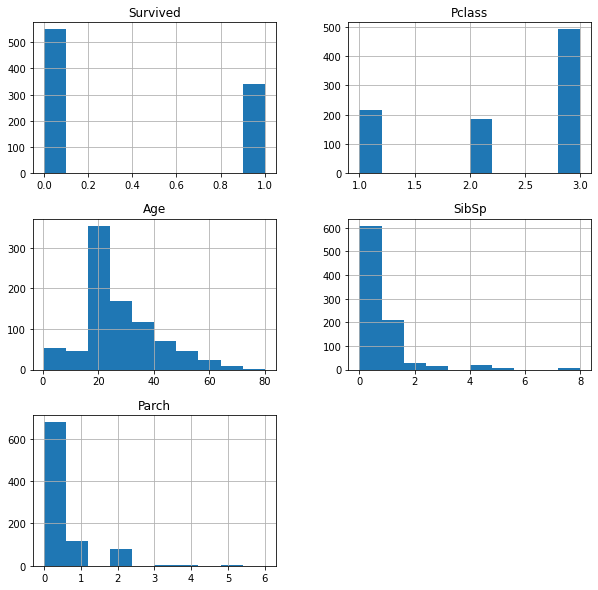

In [34]:
# Checking the distribution of the data
train.hist(figsize = (10,10));

In [35]:
# Kurtosis 
print(train.kurt())
print(train.kurt().sum())

Survived    -1.775005
Pclass      -1.280015
Age          0.922659
SibSp       17.880420
Parch        9.778125
dtype: float64
25.526184555452424


In [36]:
# Skew
print(train.skew())
print(train.skew().sum())

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
dtype: float64
6.950197212674988


## Univariate Analysis.

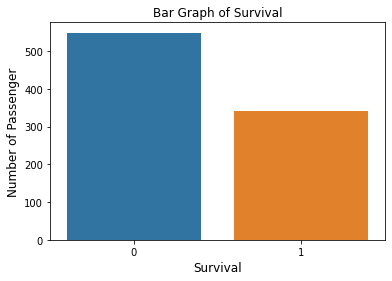

In [37]:
# Visualizing the Status of patients
sns.countplot('Survived', data=train)
plt.xlabel('Survival', fontsize=12)
plt.ylabel('Number of Passenger', fontsize=12)
plt.title('Bar Graph of Survival', fontsize=12)
plt.show()

A larger proportion of passengers aboard the titanic did not survive.

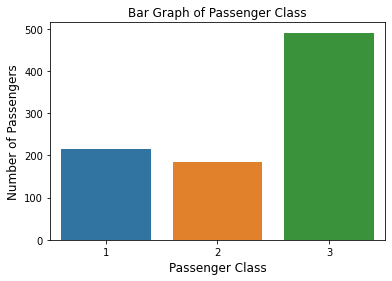

In [38]:
# Visualizing the Gender of Patients
sns.countplot('Pclass', data=train)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Bar Graph of Passenger Class', fontsize=12)
plt.show()

The largest portion of passengers aboard the titanic were in the 3rd class, and an almost equal portion were in the 1st and 2nd classes.

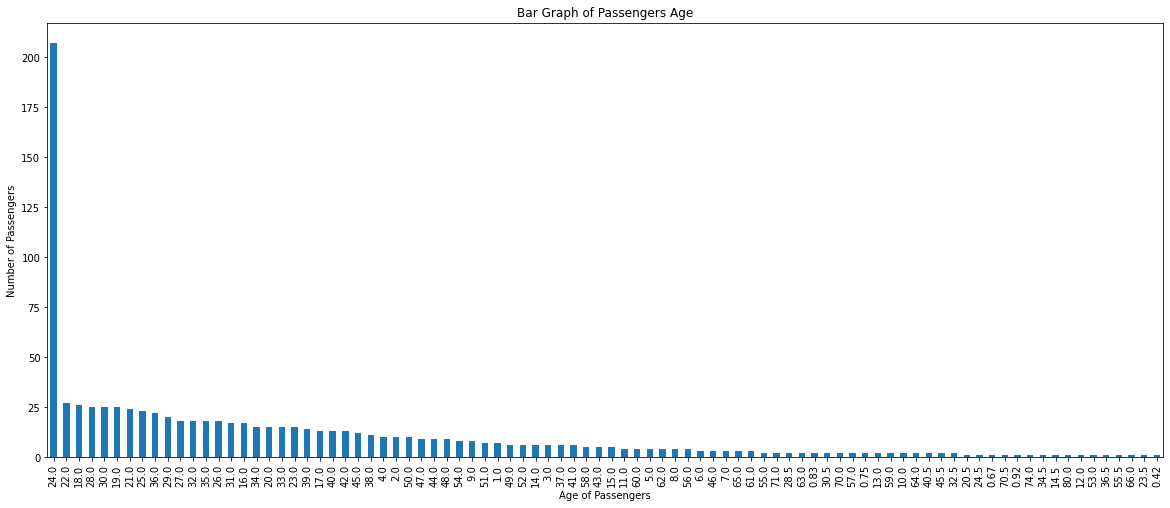

In [39]:
# Visualizing the age of patients.
plt.figure(figsize = (20,8))
train['Age'].value_counts().plot(kind='bar',rot=90)
plt.xlabel('Age of Passengers')
plt.ylabel('Number of Passengers')
plt.title('Bar Graph of Passengers Age')
plt.show()

A large proportion of passengers were of age 24 years, and most of the other passengers were distributed between ages 18 and 50 years.

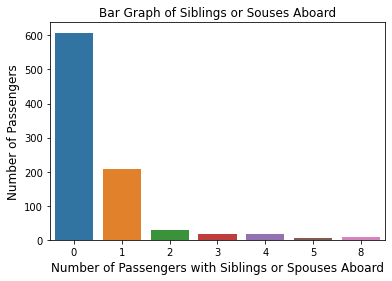

In [40]:
# Visualizing the Status of patients
sns.countplot('SibSp', data=train)
plt.xlabel('Number of Passengers with Siblings or Spouses Aboard', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Bar Graph of Siblings or Souses Aboard', fontsize=12)
plt.show()

Most of the passengers did not have a sibling or spouse aboard with them, some had one and even fewer had two or more siblings or spouses aboard with them.

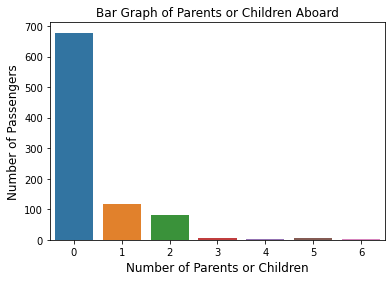

In [41]:
# Visualizing the Status of patients

sns.countplot('Parch', data=train)
plt.xlabel('Number of Parents or Children', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Bar Graph of Parents or Children Aboard', fontsize=12)
plt.show()

Most of the passengers did not have a parent or child aboard with them, but some had one, two up six children aboard with them.

## Bivariate Analysis.

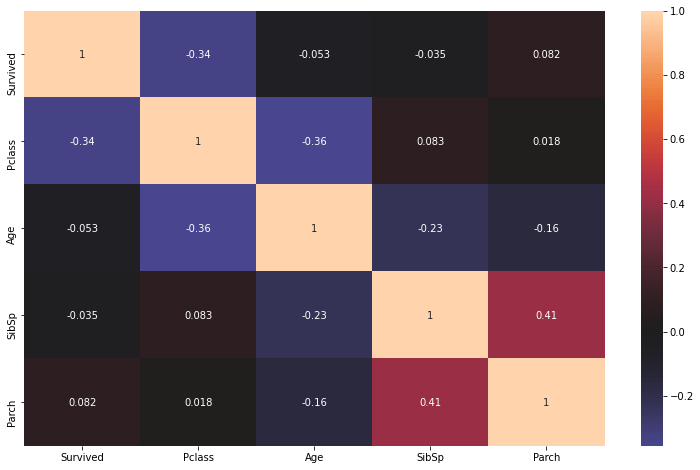

In [42]:
# Heatmap showing how all variables correlate

corr = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, annot = True, center = 0)
plt.show()

* There is little correlation between most of the features.
* There is significant positive correlation between SibSp and Parch columns.

<Figure size 288x288 with 0 Axes>

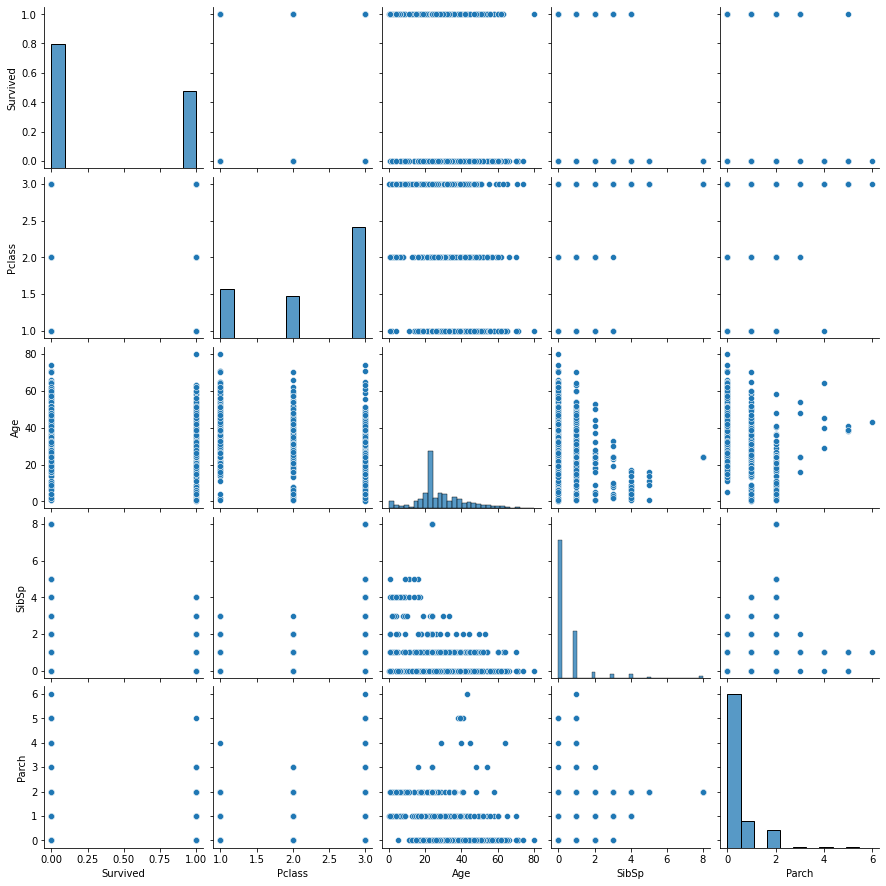

In [43]:
#a scatter plot showing how all numerical variables correlate with each other
plt.figure(figsize = (4,4))
sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])
plt.show()

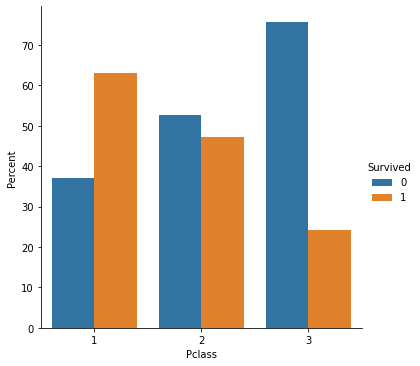

In [44]:
# Plotting the Survival for each Passenger Class.
x,y = 'Pclass', 'Survived'
(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))

More than 60% of First Class passengers survived, followed by the Second Class where almost 50% survived, while less than 30% of passengers in the Third Class survived.

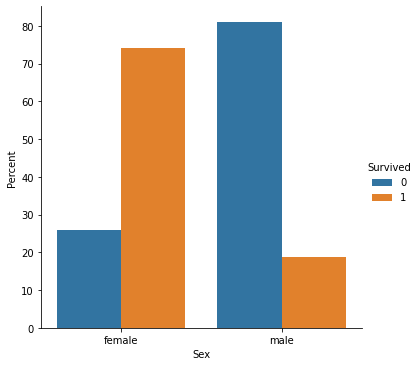

In [45]:
# Plotting the Survival for each Gender.
x,y = 'Sex', 'Survived'
(train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'))

More than 70% of the female passengers survived while less than 20% of male passengers sorvived.

# Implementing the Solution

## KNN Model.

In [46]:
# Defing categorical columns
categorical=['Sex']

In [47]:
# Creating a dataframe for KNN Modelling
df_le = train
# Label encoding.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_le[categorical] = df_le[categorical].apply(lambda col: le.fit_transform(col))
df_le.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0


In [48]:
# Defining our variables
df = df_le
from sklearn.preprocessing import StandardScaler
variables = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = df.loc[:, variables].values
y = df.loc[:,['Survived']].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

## 80-20 Split.

In [49]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [53]:
# Evaluating the Algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print('Accuracy score =:', accuracy_score(y_test, y_pred))
print('f1 score=',  f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.8324022346368715
f1 score= 0.7580645161290324
[[102   8]
 [ 22  47]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [54]:
# Assessing the errors
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16759776536312848
Mean Squared Error: 0.16759776536312848
Root Mean Squared Error: 0.40938706057120133


The initial 80-20 split model had an accuracy of 83.24% and an f1 score of 75.8%.

The confusion matrix had 102, 47 accurate predictions and 8, 22 inaccurate predictions.

## 70-30 Split.

In [55]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print('Accuracy score =:', accuracy_score(y_test, y_pred))
print('f1 score=',  f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7835820895522388
f1 score= 0.7070707070707072
[[140  28]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       168
           1       0.71      0.70      0.71       100

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [56]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21641791044776118
Mean Squared Error: 0.21641791044776118
Root Mean Squared Error: 0.46520738434354325


The 70-30 split model had an accuracy of 78.36% and an f1 score of 70.7%.

The confusion matrix had 140, 70 accurate predictions and 28, 30 inaccurate predictions.

## 60-40 Split.

In [57]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print('Accuracy score =:', accuracy_score(y_test, y_pred))
print('f1 score=',  f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.773109243697479
f1 score= 0.6966292134831461
[[183  38]
 [ 43  93]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       221
           1       0.71      0.68      0.70       136

    accuracy                           0.77       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357



In [58]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.226890756302521
Mean Squared Error: 0.226890756302521
Root Mean Squared Error: 0.4763305116224668


The 60-40 split model had an accuracy of 77.3% and an f1 score of 69.7%.

The confusion matrix had 183, 93 accurate predictions and 38, 43 inaccurate predictions.

# Hyperparameter tuning.

## Feature reduction.

In [59]:
# # Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [60]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
# we create a list
weight_options = ['uniform', 'distance']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 26
Best p: 1
Best n_neighbors: 13


In [61]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13,leaf_size=26,p=1)
classifier.fit(X_train, y_train)
# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

In [62]:
# Evaluating the Algorithm
print('Accuracy score =:', accuracy_score(y_test, y_pred))
print('f1 score=',  f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score =: 0.7955182072829131
f1 score= 0.6970954356846473
[[200  21]
 [ 52  84]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.85       221
           1       0.80      0.62      0.70       136

    accuracy                           0.80       357
   macro avg       0.80      0.76      0.77       357
weighted avg       0.80      0.80      0.79       357



In [63]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20448179271708683
Mean Squared Error: 0.20448179271708683
Root Mean Squared Error: 0.45219663059015247


The iproved 80-20 split model had an accuracy of 79.5% and an f1 score of 69.7%.

The confusion matrix had 200, 84 accurate predictions and 21, 52 inaccurate predictions.

# Testing using the test data.

In [64]:
# Previewing the testing dataframe
test.head(2)

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0


In [65]:
# Defining categorical columns
categorical=['Sex']

In [66]:
# Creating a dataframe for KNN Modelling
df_le = test
# Label encoding.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_le[categorical] = df_le[categorical].apply(lambda col: le.fit_transform(col))
df_le.head(2)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0


In [67]:
# Checking the size of df_le dataframe
df_le.shape

(418, 5)

In [68]:
# Adding a new column to the test dataframe 
# Declare a list that is to be converted into a column 
data = np.random.randint(0,1,size=418)
df = pd.DataFrame(data, columns=['Survived'])
# Joining the dataframes
test1 = pd.concat([df,df_le], axis=1)
test1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,34.5,0,0
1,0,3,0,47.0,1,0


In [69]:
# Defining our variables
df = test1
from sklearn.preprocessing import StandardScaler
variables = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = df.loc[:, variables].values
y = df.loc[:,['Survived']].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
print('Accuracy score =:', accuracy_score(y_test, y_pred))
print('f1 score=',  f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy score =: 1.0
f1 score= 0.0
[[168]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [70]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


## Predicting Using the test dataset.

In [74]:
# Using the test data to predict the survival
test_prediction = classifier.predict(test)
test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
# Testing the model using the test data
predicts = pd.Series(classifier.predict(test), name='Survived')
input_ = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
# Joining the input and output
output = pd.concat([input_, predicts], axis=1)
output.head()

,Pclass,Sex,Age,SibSp,Parch,Survived
0,3,1,34.5,0,0,0
1,3,0,47.0,1,0,0
2,2,1,62.0,0,0,0
3,3,1,27.0,0,0,0
4,3,0,22.0,1,1,0


# Challenging the Solution.

In [76]:
# Reviewing the Solution 
# compare algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Declaring our X and y variables
X = train.loc[:, variables].values
y = train.loc[:,['Survived']].values

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.798963 (0.049325)
LDA: 0.790513 (0.049926)
KNN: 0.761033 (0.046534)
CART: 0.784996 (0.044532)
RF: 0.791980 (0.056440)
GBC: 0.814495 (0.036480)
NB: 0.762520 (0.046784)
SVM: 0.797555 (0.052069)


# Conclusion.

* From the prediction models used, Gradient Boost Classifier was found to have the highest accuracy of 81.6% compared to other models.

* It is recommended to use the Gradient Boost as the prediction model for survival.